In [146]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

## Data

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe (1/0) a term deposit (variable y).

This dataset provides the customer information. It includes 41188 records and 21 fields.

In [147]:
### Q. Read the bank dataset 
data = pd.read_csv("bank.csv", sep=';')

In [148]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


#### Input variables

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - (numeric)

17 - cons.price.idx: consumer price index - (numeric)

18 - cons.conf.idx: consumer confidence index - (numeric) 

19 - euribor3m: euribor 3 month rate - (numeric)

20 - nr.employed: number of employees - (numeric)

#### Predict variable (desired target):

y - has the client subscribed a term deposit? (binary: '1','0')

The education column of the dataset has many categories and we need to reduce the categories for a better modelling. The education column has the following categories:

In [149]:
### Data transformation
data['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

Let us group "basic.4y", "basic.9y" and "basic.6y" together and call them "basic".

In [150]:
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

After grouping, this is the columns

In [151]:
data['education'].unique()

array(['Basic', 'high.school', 'university.degree', 'professional.course',
       'unknown', 'illiterate'], dtype=object)

### Data preparation

no     3668
yes     451
Name: y, dtype: int64


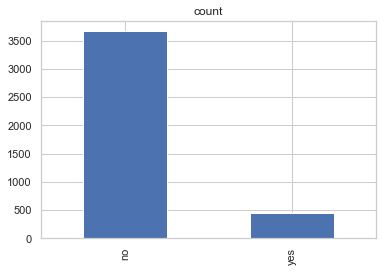

In [9]:
### Q. Find out in the target column what is the respective count of values
print(data['y'].value_counts())
### Q. Also plot the values of y in form of a bar graph
data['y'].value_counts().plot(title='count', kind='bar')

There are 3668 no's and 451 yes's in the outcome variables.

Let's get a sense of the numbers across the two classes

Text(0, 0.5, 'Purchase frequency')

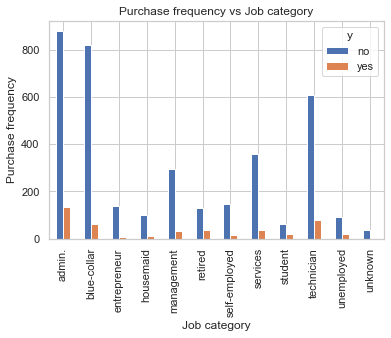

In [10]:
## Create a visualization as shown below for variable 'job' and frequency of purchase
data.groupby(['job','y']).size().unstack().plot(kind='bar',stacked=False)
plt.title("Purchase frequency vs Job category")
plt.xlabel("Job category")
plt.ylabel("Purchase frequency")

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

Text(0, 0.5, 'Purchase frequency')

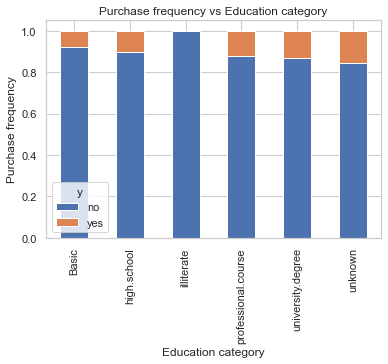

In [11]:
### Create a stacked bar chart between variables 'Education','Purchase' and Proportion of Customers
(data.groupby(['education','y']).size() / data.groupby(['education']).size()).unstack().plot(kind='bar',stacked=True)
plt.title("Purchase frequency vs Education category")
plt.xlabel("Education category")
plt.ylabel("Purchase frequency")

Education seems a good predictor of the outcome variable.

Text(0, 0.5, 'Purchase frequency')

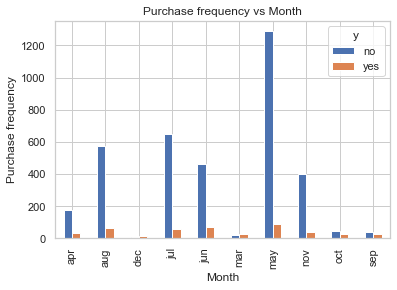

In [12]:
## Q. Write code for the visualization as shown below
data.groupby(['month','y']).size().unstack().plot(kind='bar',stacked=False)
plt.title("Purchase frequency vs Month")
plt.xlabel("Month")
plt.ylabel("Purchase frequency")

Month might be a good predictor of the outcome variable

Text(0, 0.5, 'Number of customers')

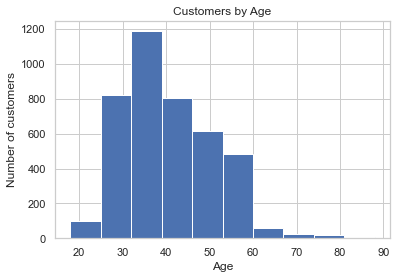

In [14]:
## Q. Write code for the visualization as shown below
data['age'].hist()
plt.title("Customers by Age")
plt.xlabel("Age")
plt.ylabel("Number of customers")

The most of the customers of the bank in this dataset are in the age range of 30-40.

In [152]:
## Write code to convert following columns to equivalent dummy variables
categories = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_final = pd.get_dummies(data, columns = categories, drop_first=True)
data_final.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,1,0,0,0,0,0,0,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,1,0,0,0,0,0,0,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,0,0,0,0,1,1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,0,0,0,0,0,0,0,0,1,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,0,1,0,0,1,0,0,0,1,0


In [213]:
dummies=data_final.columns.values.tolist()
y=['y']
X=[i for i in dummies if i not in y]
print(len(X), X)

51 ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', 'marital_unknown', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_unknown', 'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success']


### Feature Selection

In [154]:
## Find the best posible features using feature engineering techniques
model = LogisticRegression(max_iter=5000)
rfe = RFE(estimator=model, n_features_to_select=18)
rfe = rfe.fit(data_final[X], data_final.y)
#print(rfe.support_)
#print(rfe.ranking_)

For example --

The Recursive Feature Elimination (RFE) has helped us select the following features: "previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", "poutcome_failure", "poutcome_nonexistent", "poutcome_success".

In [155]:
features=[X[i] for i in range(len(X)) if rfe.support_[i] & (X[i] not in y)]
print('Selected features => ', features)
X=data_final[features]
y=data_final['y']

Selected features =>  ['previous', 'emp.var.rate', 'cons.price.idx', 'job_blue-collar', 'job_entrepreneur', 'job_management', 'job_self-employed', 'job_services', 'job_unknown', 'housing_unknown', 'contact_telephone', 'month_aug', 'month_dec', 'month_mar', 'month_may', 'month_nov', 'poutcome_nonexistent', 'poutcome_success']


### Implementing the model

### XG Boost based Model Fitting

In [25]:
## Write code to implement XG Boost module by training the X,Y variables and perform prediction on the Test dataset.
import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
model = xgb.XGBClassifier(objective = "reg:squarederror", random_state = 0)
model.fit(X_train,y_train)

predictions = model.predict(X_test)

### Confusion Matrix

In [26]:
## Create the confusion matrix
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, predictions))

[[721  27]
 [ 58  18]]


### Accuracy

In [27]:
## Find the accuracy of your model
from sklearn.metrics import accuracy_score

print('Accuracy = ', accuracy_score(y_test, predictions))

Accuracy =  0.8968446601941747


### Multi-Threading

In [31]:
## Evaluate the effect of number of threads

Confirm that XGBoost multi-threading support is working by building a number of different XGBoost models, 
specifying the number of threads and timing how long it takes to build each model.

Note - By default this parameter (n-thread) is set to -1 to make use of all of the cores in your system.

In [42]:
import time

times = []
for i in range(8):
    model = xgb.XGBClassifier(objective = "reg:squarederror", random_state = 0, nthread = i+1)
    start = time.time()
    model.fit(X_train,y_train)
    end = time.time()
    print('Timing using {0:d} threads is {1:.2f}s'.format(i+1, end - start))
    times.append(end - start)

Timing using 1 threads is 0.32s
Timing using 2 threads is 0.22s
Timing using 3 threads is 0.19s
Timing using 4 threads is 0.19s
Timing using 5 threads is 0.18s
Timing using 6 threads is 0.18s
Timing using 7 threads is 0.18s
Timing using 8 threads is 0.19s


Text(0, 0.5, 'Processing time')

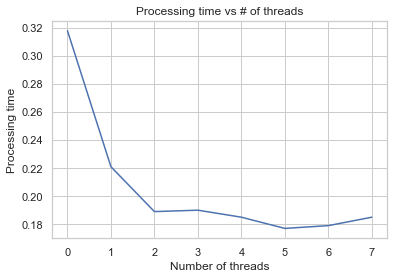

In [44]:
## Plot a graph between XGBoost training speed Vs. Number of Threads.
plt.plot(times)
plt.title("Processing time vs # of threads")
plt.xlabel("Number of threads")
plt.ylabel("Processing time (s)")

Analyze the improvement in the running time for each new thread.

As my computer has 4 CPUs the processing time is reduced from 1 to 4 threads. As it also uses the hyper-threading technology we can see that with 5 threads performances are still better but then no more improvement can be seen. Indeed, hyper-threading does not mean more cores but more efficient cores to dispatch threads. If we perform some others tasks in parallel this might improve the global processing time but as I only focus on the fitting here it is not really relevant in my humble opinion.

### Cross-validation

In [64]:
## Disable multi-threading support in XGBoost and allow 10-fold cross validation to run on all cores.

Single Thread XGBoost, Parallel Thread CV

In [113]:
from sklearn.model_selection import cross_val_score

times = []
model = xgb.XGBClassifier(objective = "reg:squarederror", random_state = 0, nthread = 1)
start = time.time()
print(cross_val_score(model, X_train, y_train, cv = 10, n_jobs = -1))
end = time.time()
print('Timing is {0:.2f}s'.format(end - start))
times.append(end - start)

[0.88787879 0.89090909 0.88181818 0.88484848 0.8969697  0.89057751
 0.88449848 0.88753799 0.89361702 0.89969605]
Timing is 0.82s


In [99]:
## Disable multi-threading support in cross validation and allow XGBoost to run on all cores.

Parallel Thread XGBoost, Single Thread CV

In [114]:
model = xgb.XGBClassifier(objective = "reg:squarederror", random_state = 0, nthread = -1)
start = time.time()
print(cross_val_score(model, X_train, y_train, cv = 10, n_jobs = 1))
end = time.time()
print('Timing is {0:.2f}s'.format(end - start))
times.append(end - start)

D:\Applications\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0.88787879 0.89090909 0.88181818 0.88484848 0.8969697  0.89057751
 0.88449848 0.88753799 0.89361702 0.89969605]
Timing is 1.96s


In [101]:
## Enable multi-threading support for both XGBoost and Cross validation.

Parallel Thread XGBoost and CV

In [115]:
model = xgb.XGBClassifier(objective = "reg:squarederror", random_state = 0, nthread = -1)
start = time.time()
print(cross_val_score(model, X_train, y_train, cv = 10, n_jobs = -1))
end = time.time()
print('Timing is {0:.2f}s'.format(end - start))
times.append(end - start)

[0.88787879 0.89090909 0.88181818 0.88484848 0.8969697  0.89057751
 0.88449848 0.88753799 0.89361702 0.89969605]
Timing is 1.09s


In [116]:
## Plot a bar graph to compare the results of parallelizing the XGBoost over cross validation folds.

[0.81600022315979, 1.958998441696167, 1.094977617263794]


Text(0, 0.5, 'Processing time (s)')

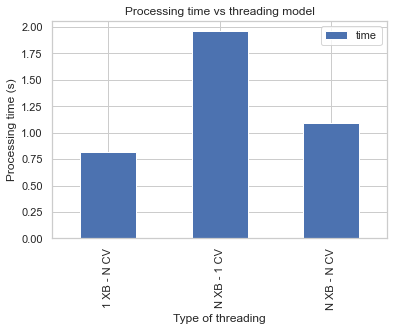

In [117]:
print(times)
times_df = pd.DataFrame({ 'time': times }, index =['1 XB - N CV', 'N XB - 1 CV', 'N XB - N CV']) 
times_df.plot(kind='bar')
plt.title("Processing time vs threading model")
plt.xlabel("Type of threading")
plt.ylabel("Processing time (s)")

It appears that using threading mainly for cross validation is the best strategy. It's probably because each subset for validation implies a model fitting so that if the model also uses threading the final number of threads is far more greater than the number of cores, which is not optimal.

In [ ]:
## Train the model and plot best possible ROC and AUC graphs.

D:\Applications\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


ROC AUC=0.666


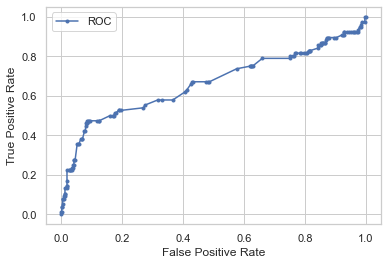

In [219]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

model = xgb.XGBClassifier(objective = "reg:squarederror", random_state = 0)
model.fit(X_train,y_train)
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate scores
auc = roc_auc_score(y_test, probs)
print('ROC AUC=%.3f' % (auc))
# calculate roc curve
fpr, tpr, _ = roc_curve(y_test, probs, pos_label='yes')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.', label='ROC')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Model Deployment

Production typically means an end-point in the form of an API that the end-user can access. For Python, many options are available such as Flask, Falcon, Starlette, Sanic, FastAPI, Tornado, etc.

Note - 
pip install fastapi
pip install uvicorn

#### Case - 1

In [220]:
## Save your finalized model and features (X, y) using joblib or pickel.
from joblib import dump, load

print('Saving train data', end='...')
X_train.to_pickle('X_train.pkl')
y_train.to_pickle('y_train.pkl')
print('OK')
print('Saving test data', end='...')
X_test.to_pickle('X_test.pkl')
y_test.to_pickle('y_test.pkl')
print('OK')
print('Saving model data', end='...')
variables = data.columns.drop(['y']).to_list()
dump(variables, 'variables.joblib')
dump(categories, 'categories.joblib')
dump(features, 'features.joblib')
dump(dummies, 'dummies.joblib')
dump(model, 'model.joblib')
print('OK')

Saving train data...OK
Saving test data...OK
Saving model data...OK


In [258]:
## Create a class called 'Data' which defines all variables used in the model.
class Data(dict):
    # The model sata is shared by all samples
    variables = load('variables.joblib')
    categories = load('categories.joblib')
    features = load('features.joblib')
    dummies = load('dummies.joblib')
    model = load('model.joblib')
    
    def __init__(self, values):
        # Start by defining required variables
        for variable in self.variables:
            value = values[variable]
            # Convert to native Python type in order to serialize to JSON
            if isinstance(value, np.int64):
                self[variable] = value.tolist()
            else:
                self[variable] = value
      
# Use the first row of our dataset as a sample
sample = Data(data.iloc[0])
print(sample)

{'age': 30, 'job': 'blue-collar', 'marital': 'married', 'education': 'Basic', 'default': 'no', 'housing': 'yes', 'loan': 'no', 'contact': 'cellular', 'month': 'may', 'day_of_week': 'fri', 'duration': 487, 'campaign': 2, 'pdays': 999, 'previous': 0, 'poutcome': 'nonexistent', 'emp.var.rate': -1.8, 'cons.price.idx': 92.89299999999999, 'cons.conf.idx': -46.2, 'euribor3m': 1.3130000000000002, 'nr.employed': 5099.1}


This helps in tracking the variables that we use but also creates documentation based on the class that we made.

In [255]:
## Create a method to load all the input features, model and return the prediction value of the target variable.

In [256]:
def predict(self): # Have to add self since this will become a method
    # Create a dataframe from variables so that we can get dummies
    # We should also have created/saved a OneHotEncoder previously and use it
    self.data = pd.DataFrame(self, columns = self.variables, index=[0])
    self.data = pd.get_dummies(self.data, columns = self.categories)
    # Ensure we have all required dummies as the sampel does not contains all possible categorical values
    self.data = self.data.reindex(columns = self.dummies, fill_value=0)
    # As we predict only a single sample return the value directly
    return self.model.predict(self.data[self.features])[0]
    
# Add method to the class dynamically
# we should do it directly when defining the class but we keep the order of the exercise
setattr(Data, 'predict', predict)

print('Predicted value for sample is', sample.predict())

Predicted value for sample is no


### Conclusion

Based on the previous code the class has been exported in the `deploy-uvicorn.py` script so you can load the server with the following command from console --
<b>uvicorn deploy-uvicorn:app</b>

The following code can be used to check if the API works as expected

In [267]:
import requests

url = 'http://127.0.0.1:8000/predict'
response = requests.post(url, json=dict(sample))
print(response)
response.json()

<Response [200]>


{'y': 'no'}

Although your API can technically now be used in production, it would be helpful to include documentation, log what happens in your API, and to containerize your solution.

#### Case 2

In [ ]:
## Model deployment through flask

 -- In order to collect the data in an organised manner, create a HTML form which would contain all the different options to select from each attribute.

In [ ]:
## Import Flask and create folder templates which will be used to render HTML displays in user's browser. 

In [ ]:
## Run Flask application and launch a simple server. (http://127.0.0.1:8000)

Based on the previous code the class has been exported in the `deploy-flask.py` script so you can load the server with the following command from console --
<b>python deploy-flask.py</b>

The following code can be used to check if the API works as expected

In [268]:
import requests

url = 'http://127.0.0.1:8000/predict'
response = requests.post(url, json=dict(sample))
print(response)
response.json()

<Response [200]>


{'y': 'no'}

In [ ]:
## Load the model and predict target values. (When someone submits the form, the webpage should display the predicted value of )

#### Case - 3

In [ ]:
## Deploy the model using MLflow tracking server and docker which can be used to package model development workflow into a reusable, parameterized module.

ML Flow is an open source suite of tools that help manage the ML model development lifecycle.

### Miscellaneous 

 <b>Ques 1 </b><br>
Consider a Pandas dataframe with random integers (3 x 10). 
<br>
(i) Write a function 'cubes' such that it takes two at a time and calculate - $ (a)^3 + (b)^3  $
<br>
(ii) Use Multiprocessing and apply the 'cubes' function on each row, but running 4 processes at a time.

<b> Ques 2 </b> <br>
Use Pool.map() to run the following python scripts in parallel.
Script names: ‘script1.py’, ‘script2.py’, ‘script3.py’

<b> Ques 3 </b> <br>
Normalize each row of 2d array (list) to vary between 0 and 1.

list_a = [[2, 3, 4, 5], [6, 9, 10, 12], [11, 12, 13, 14], [21, 24, 25, 26]]

<b> Ques 4 </b> <br>
Use Pool.apply() to get the row wise common items in list_a and list_b. <br>

list_a = [[1, 2, 3], [5, 6, 7, 8], [10, 11, 12], [20, 21]] <br>
list_b = [[2, 3, 4, 5], [6, 9, 10], [11, 12, 13, 14], [21, 24, 25]]

<b> Ques 5 </b><br> 
What is the method that wakes up all thread waiting for the condition? 
1. notify() <br>
2. notifyAll() <br>
3. release() <br>
4. releaseAll() <br>


<b> Ques 6 </b><br> 
What is the exception raised for an error that doesn’t fall in any of the categories?
1. ReferenceError <br>
2. RuntimeError <br>
3. SystemError <br>
4. LookupError <br>

<b> Ques 7 </b><br> 
How does global value mutation used for thread-safety? 
1. None <br>
2. via Locking <br>
3. via GIL (Global Interpreter Lock) <br>
4. via Mutex <br>

<b> Ques 8 </b><br> 
What is the method to retrieve the list of all active threads?
1. enumerate() <br>
2. getList() <br>
3. threads() <br>
4. getThreads() <br>

<b> Ques 9 </b><br> 
Consider a list a = ['red', 'green', 'blue', 'black']. Use multiprocessing module Queue to put list data into queue and pop out using queue.get()

<b> Ques 10 </b><br> 
Suppose we have some tasks to accomplish. To get that task done, we will use several processes. So, we will maintain two queue. One will contain the tasks and the other will contain the log of completed task.

Then we instantiate the processes to complete the task. Write a Python script to add tasks to the queue, then creating processes and starting them, then using join( ) to complete the processes.
Also, print the log from the second queue.

### References --

1. XG Boost tutorial -- https://acadgild.com/blog/xgboost-python

2. Feature Engineering -- https://www.kaggle.com/learn/feature-engineering

3. XGBoost parameters (nthread) -- https://xgboost.readthedocs.io/en/latest/parameter.html

4. Introduction to threading in Python -- https://realpython.com/intro-to-python-threading/

5. Parallelism in python -- https://www.toptal.com/python/beginners-guide-to-concurrency-and-parallelism-in-python

6. Fast API -- https://fastapi.tiangolo.com/

7. Uvicorn -- https://www.uvicorn.org/

8. Model deployment through Flask -- https://www.geeksforgeeks.org/deploy-machine-learning-model-using-flask/

9. MLFlow projects -- 9. https://mlflow.org/docs/latest/projects.html

10. ML model deployment (re-usability) -- https://christophergs.com/machine%20learning/2019/03/17/how-to-deploy-machine-learning-models/